# <center> Kaggle Challenge 2 <center>
#  <center>    Ayush Singla and Tanvi Shroff <center>

In [166]:
# Importing useful libraries
import pandas as pd
import numpy as np
from uszipcode import SearchEngine
import re

# Reading DataSets

In [167]:
# Reading train data
data_train=pd.read_csv("training_data_actual.csv")

C:\Users\urvis\AppData\Local\Temp\ipykernel_34056\4016856168.py:2: DtypeWarning: Columns (31,38,40) have mixed types. Specify dtype option on import or set low_memory=False.
  data_train=pd.read_csv("training_data_actual.csv")


In [168]:
# Reading test data
data_test=pd.read_csv("test_data_actual.csv")

In [169]:
# Reading additional data from remanining 4 datasets
all_candidates=pd.read_csv("all_candidates_state_bipartite_weighted_network_actual.csv")
winning_candidates=pd.read_csv("winning_candidates_state_bipartite_weighted_network_actual.csv")
fed=pd.read_csv("federal_contributor_top100_contributors_network_actual.csv")
state=pd.read_csv("state_contributor_top100_contributors_network _actual.csv")

# Data Cleaning

### While analysing the dataset we noticed that there were incorrect values in the 'state' column. Cases where city = New York, the state was US. There were 36000 such cases where the state was US. To fix this, we used the zip code and wrote a script to get the correct state where the state was US. On further analysis, we saw that there were 4 digit zipcodes. In such cases, a 0 was appended before the number to convert it to the standard 5 digit zipcode. 

In [170]:
data_train['zip_code'] = data_train['zip_code'].fillna(-1).astype(int) #filling nas with -1

In [171]:
data_train['zip_code'] = data_train['zip_code'].astype(str).str.zfill(5) #appending 0 to make all zipcodes 5 digits

In [172]:
# initializing uszipcode search engine
search = SearchEngine()
def state_givenzip(zipcode):
    try:
        result = search.by_zipcode(zipcode)
        state = result.state
    except:
        state = None
    return state



In [173]:
# apply function to 'zip_code' column and store results in new 'state' column
data_train['New_state'] = data_train.apply(lambda row: row['state'] if row['state'] != 'US' else state_givenzip(row['zip_code']), axis=1)

In [174]:
data_train['New_state'].isna().sum()

30

In [175]:
#dropping columns we do not need
all_candidates=all_candidates.drop(columns=["Unnamed: 1"])
winning_candidates=winning_candidates.drop(columns=["Unnamed: 1"])

In [176]:
#summing all values columwise to get the contribution
all_candidates_sum = all_candidates.sum(numeric_only=True)
all_candidates_sum.values

array([1.09296355e+01, 6.14855030e+03, 5.98429274e+01, 1.73061844e+02,
       9.55173198e+03, 2.38873625e+02, 1.43423128e+01, 6.66978355e+02,
       1.15130348e+04, 9.76084479e+02, 9.32327115e+02, 6.56394705e+03,
       2.00446743e+03, 1.21754654e+04, 1.56164295e+03, 6.87667732e+00,
       1.85730786e+04, 1.08350322e+02, 2.60523252e+03, 9.13054745e+02,
       4.34940729e+03, 2.98920882e+03, 1.01398463e+04, 1.74715790e+03,
       1.39339446e+04, 8.22794456e+00, 5.49595476e+03, 1.57682501e+01,
       2.37652529e+01, 1.59732758e+03, 2.57276042e+03, 5.07517382e+00,
       5.63767828e+00, 1.22843172e+03, 4.21443338e+02, 1.04236473e+03,
       3.11235498e+03, 1.31640163e+03, 1.17109700e+03, 2.61780684e+03,
       1.29606438e+03, 2.85531057e+03, 2.25046918e+03, 2.29283066e+03,
       1.59596587e+03, 3.42794642e+03, 4.96198843e+03, 6.90775528e+00,
       2.95264167e+03, 2.99324906e+03, 2.45879481e+03, 1.07011355e+03,
       2.99078056e+03, 5.20182186e+02, 2.01250053e+03, 3.23667667e+03,
      

In [177]:
#summing all values columwise to get the contribution
winning_candidates_sum = winning_candidates.sum(numeric_only=True)
winning_candidates_sum.values

array([1.09296355e+01, 4.09978063e+03, 4.67532195e+01, 1.35303653e+02,
       7.88766819e+03, 2.04993028e+02, 1.43423128e+01, 5.13216683e+02,
       9.37636376e+03, 5.18807206e+02, 6.77287958e+02, 5.73538820e+03,
       1.33319529e+03, 1.01625372e+04, 1.24159246e+03, 6.87667732e+00,
       1.63477859e+04, 7.75864309e+01, 2.23917717e+03, 6.34439281e+02,
       3.54646475e+03, 2.21497517e+03, 7.51846989e+03, 1.37811851e+03,
       1.18218356e+04, 8.22794456e+00, 3.98021497e+03, 1.57682501e+01,
       2.37652529e+01, 7.10651539e+02, 1.71225990e+03, 5.07517382e+00,
       5.63767828e+00, 9.31569969e+02, 2.36530630e+02, 7.74558700e+02,
       2.47786804e+03, 1.01388362e+03, 9.54626837e+02, 2.22005208e+03,
       7.84361865e+02, 2.01512360e+03, 1.34789735e+03, 1.71951426e+03,
       1.14089498e+03, 2.68124444e+03, 3.71952477e+03, 6.90775528e+00,
       2.22068874e+03, 2.38114178e+03, 1.93403139e+03, 6.07217152e+02,
       2.08334315e+03, 4.13167196e+02, 1.46243349e+03, 1.72700398e+03,
      

In [178]:
states=['ZZ', 'WA', 'WV', 'DE', 'DC', 'WI', 'NO', 'HI', 'FL',
       'WY', 'NH', 'NJ', 'NM', 'TX', 'LA', 'NB', 'NC', 'ND', 'NE', 'TN', 'NY',
       'PA', 'CA', 'NV', 'VA', 'CH', 'CO', 'ON', 'VI', 'AK', 'AL', 'BI', 'VQ',
       'XX', 'AR', 'VT', 'IL', 'GA', 'IN', 'IA', 'OK', 'AZ', 'ID', 'CT', 'ME',
       'MD', 'MA', 'MC', 'OH', 'UT', 'MO', 'MN', 'MI', 'RI', 'KS', 'MT', 'UN',
       'SN', 'MS', 'PR', 'SC', 'KY', 'OR', 'SD']

In [179]:
#creating a new df which has statewise sum of contribution for all and winning candidates
new_df=pd.DataFrame()
new_df['state']=states
new_df['all_candidates_sum'] = all_candidates_sum.values
new_df['winning_candidates_sum'] = winning_candidates_sum.values

In [180]:
#divivng sum contribution of winning by sum contribution of state to get percentage of contribution of winning candidates
new_df["perc_cont"]=new_df['winning_candidates_sum']/new_df['all_candidates_sum']
new_df.drop(columns=["all_candidates_sum","winning_candidates_sum"],inplace=True)
#renaming columns
new_df.columns=["New_state","perc_cont"]
new_df.head(2)

,New_state,perc_cont
0,ZZ,1.000000
1,WA,0.666788


In [181]:
new_df.columns

Index(['New_state', 'perc_cont'], dtype='object')

In [182]:
#creating new df and merging data_train and new_df statewise
data_train_v1=data_train.merge(new_df,how='left',on='New_state')

In [183]:
data_train_v1.drop(columns=["state"],inplace=True)
data_train_v1.rename(columns={"New_state": "state"},inplace=True)

In [184]:
data_train_v1.head(2)

,general_sector,city,zip_code,specific_sector,contributor_type,winner_ratio,candidacy_count,candidacy_democratic_count,candidacy_republican_count,contribution_count,...,politician_challenger_ratio,politician_democratic_ratio,politician_incumbency_ratio,politician_open_pos_ratio,politician_republican_ratio,senate_contribution_ratio,us_house_contribution_ratio,us_senate_contribution_ratio,state,perc_cont
0,Retired,MISSOULA,59802,Retired,Individual,1.0,4,4,0,6,...,0.0,1.0,0.5,0.5,0.0,0.0,0.0,0.0,MT,0.533573
1,Retired,CLEVELAND HTS,44118,Retired,Individual,0.5,2,2,0,2,...,0.5,1.0,0.5,0.0,0.0,0.0,0.0,0.0,OH,0.752102


In [185]:
#checking for na values
data_train_v1['perc_cont'].isna().sum()

33

In [186]:
#extracting columns from data_train_v1
x_train=data_train_v1[["candidacy_count",
"house_and_assembly_contributions_sum_2010_usd",
"senate_contributions_sum_2010_usd",
"contribution_sum_2010_usd",
"us_senate_contributions_sum_2010_usd",
"politician_democratic_count",
"contribution_democratic_count",
"governor_contributions_sum_2010_usd",
"contribution_republican_sum_2010_usd",
"house_and_assembly_contribution_ratio",
"candidacy_democratic_count",
"contribution_democratic_sum_2010_usd",
"perc_cont",
"us_house_contributions_sum_2010_usd",
"politician_republican_ratio","winner_ratio",
"governor_contribution_ratio",
"candidacy_republican_ratio",
"politician_challenger_ratio",
"contribution_republican_count_ratio",
"politician_incumbency_ratio"]]                 
                           

In [187]:
x_train.dtypes

candidacy_count                                    int64
house_and_assembly_contributions_sum_2010_usd    float64
senate_contributions_sum_2010_usd                float64
contribution_sum_2010_usd                        float64
us_senate_contributions_sum_2010_usd             float64
politician_democratic_count                        int64
contribution_democratic_count                      int64
governor_contributions_sum_2010_usd              float64
contribution_republican_sum_2010_usd             float64
house_and_assembly_contribution_ratio            float64
candidacy_democratic_count                         int64
contribution_democratic_sum_2010_usd             float64
perc_cont                                        float64
us_house_contributions_sum_2010_usd              float64
politician_republican_ratio                      float64
winner_ratio                                     float64
governor_contribution_ratio                       object
candidacy_republican_ratio     

In [188]:
x_train.isna().sum()

candidacy_count                                    0
house_and_assembly_contributions_sum_2010_usd      0
senate_contributions_sum_2010_usd                  0
contribution_sum_2010_usd                          0
us_senate_contributions_sum_2010_usd               0
politician_democratic_count                        0
contribution_democratic_count                      0
governor_contributions_sum_2010_usd                0
contribution_republican_sum_2010_usd               0
house_and_assembly_contribution_ratio            192
candidacy_democratic_count                         0
contribution_democratic_sum_2010_usd               0
perc_cont                                         33
us_house_contributions_sum_2010_usd                0
politician_republican_ratio                        0
winner_ratio                                       0
governor_contribution_ratio                      192
candidacy_republican_ratio                         0
politician_challenger_ratio                   

In [189]:
# fillling rows with null values with mean 
x_train['perc_cont']=x_train['perc_cont'].fillna(int(x_train['perc_cont'].mean()))

C:\Users\urvis\AppData\Local\Temp\ipykernel_34056\2023948384.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['perc_cont']=x_train['perc_cont'].fillna(int(x_train['perc_cont'].mean()))


In [190]:
#Dropping 'winner_ratio' column from train
y_train=x_train["winner_ratio"]
x_train_cleaned=x_train.drop(columns=["winner_ratio"])

In [191]:
x_train_cleaned.shape

(172848, 20)

In [192]:
#creating new variable by divinding contribution_democratic_sum_2010_usd by contribution_sum_2010_usd
x_train_cleaned["contr_dem_usd_perc"]=(x_train_cleaned["contribution_democratic_sum_2010_usd"])/x_train_cleaned["contribution_sum_2010_usd"]
#creating new variable by divinding contribution_republican_sum_2010_usd by contribution_sum_2010_usd
x_train_cleaned["contr_rep_usd_perc"]=(x_train_cleaned["contribution_republican_sum_2010_usd"])/x_train_cleaned["contribution_sum_2010_usd"]

print(x_train_cleaned.shape)
x_train_cleaned.head(2)


(172848, 22)


,candidacy_count,house_and_assembly_contributions_sum_2010_usd,senate_contributions_sum_2010_usd,contribution_sum_2010_usd,us_senate_contributions_sum_2010_usd,politician_democratic_count,contribution_democratic_count,governor_contributions_sum_2010_usd,contribution_republican_sum_2010_usd,house_and_assembly_contribution_ratio,...,perc_cont,us_house_contributions_sum_2010_usd,politician_republican_ratio,governor_contribution_ratio,candidacy_republican_ratio,politician_challenger_ratio,contribution_republican_count_ratio,politician_incumbency_ratio,contr_dem_usd_perc,contr_rep_usd_perc
0,4,0.00,0.0,350.00,0.0,4,6,175.0,0.0,0.000000,...,0.533573,0.0,0.0,0.5,0.0,0.0,0.0,0.5,1.0,0.0
1,2,33.44,0.0,154.67,0.0,2,2,0.0,0.0,0.216202,...,0.752102,0.0,0.0,0.0,0.0,0.5,0.0,0.5,1.0,0.0


In [193]:
# Looking at all columns to see if further feature addition/deletion is required
x_train_cleaned.isna().sum()

candidacy_count                                    0
house_and_assembly_contributions_sum_2010_usd      0
senate_contributions_sum_2010_usd                  0
contribution_sum_2010_usd                          0
us_senate_contributions_sum_2010_usd               0
politician_democratic_count                        0
contribution_democratic_count                      0
governor_contributions_sum_2010_usd                0
contribution_republican_sum_2010_usd               0
house_and_assembly_contribution_ratio            192
candidacy_democratic_count                         0
contribution_democratic_sum_2010_usd               0
perc_cont                                          0
us_house_contributions_sum_2010_usd                0
politician_republican_ratio                        0
governor_contribution_ratio                      192
candidacy_republican_ratio                         0
politician_challenger_ratio                        0
contribution_republican_count_ratio           

In [194]:
x_train_cleaned.describe()

,candidacy_count,house_and_assembly_contributions_sum_2010_usd,senate_contributions_sum_2010_usd,contribution_sum_2010_usd,us_senate_contributions_sum_2010_usd,politician_democratic_count,contribution_democratic_count,governor_contributions_sum_2010_usd,contribution_republican_sum_2010_usd,house_and_assembly_contribution_ratio,...,contribution_democratic_sum_2010_usd,perc_cont,us_house_contributions_sum_2010_usd,politician_republican_ratio,candidacy_republican_ratio,politician_challenger_ratio,contribution_republican_count_ratio,politician_incumbency_ratio,contr_dem_usd_perc,contr_rep_usd_perc
count,172848.000000,1.728480e+05,1.728480e+05,1.728480e+05,1.728480e+05,172848.000000,172848.000000,1.728480e+05,1.728480e+05,1.726560e+05,...,1.728480e+05,172848.000000,1.728480e+05,172848.000000,172848.000000,172848.000000,172848.000000,172848.000000,1.726560e+05,1.726560e+05
mean,6.055546,1.583305e+03,1.136966e+03,8.998580e+03,1.217686e+03,2.742670,5.335486,1.490252e+03,4.751944e+03,inf,...,4.246636e+03,0.792088,2.832512e+03,0.444338,0.444476,0.160345,0.444235,0.390570,-inf,inf
std,25.560675,8.325598e+04,4.461588e+04,2.788212e+05,2.818773e+04,8.458277,30.948342,1.172388e+05,2.619245e+05,NaN,...,8.293415e+04,0.072703,6.976230e+04,0.467771,0.468327,0.305183,0.469502,0.408596,NaN,NaN
min,2.000000,-1.126210e+05,-3.790261e+05,-3.674252e+05,-2.376295e+04,0.000000,0.000000,-2.440000e+04,-3.674252e+05,-6.118411e+00,...,-3.107367e+05,0.000000,-3.107367e+05,0.000000,0.000000,0.000000,0.000000,0.000000,-inf,-9.260374e+01
25%,2.000000,0.000000e+00,0.000000e+00,3.008075e+02,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.749953,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
50%,2.000000,0.000000e+00,0.000000e+00,9.851650e+02,0.000000e+00,2.000000,2.000000,0.000000e+00,3.156000e+01,0.000000e+00,...,2.251550e+02,0.814413,0.000000e+00,0.200000,0.181818,0.000000,0.153846,0.333333,9.004496e-01,9.955037e-02
75%,4.000000,2.675400e+02,9.749250e+01,2.772215e+03,0.000000e+00,2.000000,4.000000,2.963400e+02,1.000000e+03,4.905834e-01,...,1.266300e+03,0.848420,0.000000e+00,1.000000,1.000000,0.200000,1.000000,0.800000,1.000000e+00,1.000000e+00
max,2026.000000,2.229992e+07,1.375416e+07,9.503992e+07,6.783020e+06,543.000000,3990.000000,4.472358e+07,9.500888e+07,inf,...,1.468935e+07,1.000000,1.220771e+07,1.000000,1.000000,1.000000,1.000000,1.000000,9.360374e+01,inf


In [195]:
#replacing inf values with 0
x_train_cleaned["contr_dem_usd_perc"]=x_train_cleaned["contr_dem_usd_perc"].replace([np.inf, -np.inf], 0)
#replacing na values with mean of columns
x_train_cleaned["contr_dem_usd_perc"]=x_train_cleaned["contr_dem_usd_perc"].fillna(int(x_train_cleaned["contr_dem_usd_perc"].mean()))


In [196]:
#replacing inf values with 0
x_train_cleaned["governor_contribution_ratio"]=x_train_cleaned["governor_contribution_ratio"].replace([np.inf, -np.inf], 0)
#replacing na values with mean of columns
x_train_cleaned["governor_contribution_ratio"]=x_train_cleaned["governor_contribution_ratio"].fillna(0)


In [197]:
#replacing inf values with 0
x_train_cleaned["house_and_assembly_contribution_ratio"]=x_train_cleaned["house_and_assembly_contribution_ratio"].replace([np.inf, -np.inf], 0)
#replacing na values with mean of columns
x_train_cleaned["house_and_assembly_contribution_ratio"]=x_train_cleaned["house_and_assembly_contribution_ratio"].fillna(int(x_train_cleaned["house_and_assembly_contribution_ratio"].mean()))


### Working with federal data

In [198]:
#extracting state from column by getting the last two chars in the column
fed['state'] = fed['Unnamed: 0'].str[-2:]

In [199]:
#adding values row wise to get total contribuation
fed_candidates_sum = fed.sum(numeric_only=True)

In [200]:
#adding fed_candidates_sum to new column
fed['top200_sum_fed']=fed_candidates_sum.values

In [201]:
# this function is called to count the number of connections. If the number is not equal to 0, a connection is added.
def notzero(row):
    return (row != 0).sum()

In [202]:
# applying notzero function to each row and adding it as a new column
fed['fed_conn_sum'] = fed.apply(notzero, axis=1)

In [203]:
#when we call the code above it counts 3 extra as " Unnmaed column: 0","state" and "top200_sum_fed". Hence, we subtract 3 to get the correct number of connections.
fed['fed_conn_sum']=fed['fed_conn_sum']-3

In [204]:
#extracting required columns to new_fed_df
new_fed_df=fed[["state","top200_sum_fed","fed_conn_sum"]]

In [205]:
new_fed_df.head(2)

,state,top200_sum_fed,fed_conn_sum
0,NY,1424.61,1
1,IA,7864618.12,42


In [206]:
#grouping by state 
new_fed_df_group=new_fed_df.groupby(['state'],as_index=False).sum()

In [207]:
new_fed_df_group.head(2)

,state,top200_sum_fed,fed_conn_sum
0,AZ,7.116810e+06,51
1,CA,5.899838e+09,678


In [208]:
#merging data_train_v1 and new_fed_df_group based on state
data_train_v2=data_train_v1.merge(new_fed_df_group,how='left',on='state')
data_train_v2.head(2)

,general_sector,city,zip_code,specific_sector,contributor_type,winner_ratio,candidacy_count,candidacy_democratic_count,candidacy_republican_count,contribution_count,...,politician_incumbency_ratio,politician_open_pos_ratio,politician_republican_ratio,senate_contribution_ratio,us_house_contribution_ratio,us_senate_contribution_ratio,state,perc_cont,top200_sum_fed,fed_conn_sum
0,Retired,MISSOULA,59802,Retired,Individual,1.0,4,4,0,6,...,0.5,0.5,0.0,0.0,0.0,0.0,MT,0.533573,NaN,NaN
1,Retired,CLEVELAND HTS,44118,Retired,Individual,0.5,2,2,0,2,...,0.5,0.0,0.0,0.0,0.0,0.0,OH,0.752102,115829415.1,99.0


In [209]:
data_train_v2.isna().sum()

general_sector                                      0
city                                             1468
zip_code                                            0
specific_sector                                     0
contributor_type                                    0
winner_ratio                                        0
candidacy_count                                     0
candidacy_democratic_count                          0
candidacy_republican_count                          0
contribution_count                                  0
contribution_democratic_count                       0
contribution_republican_count                       0
politician_challenger_count                         0
politician_count                                    0
politician_democratic_count                         0
politician_incumbency_count                         0
politician_open_pos_count                           0
politician_republican_count                         0
contribution_democratic_sum_

In [210]:
#replacing na values with mean of columns
data_train_v2["top200_sum_fed"]=data_train_v2["top200_sum_fed"].fillna(int(data_train_v2["top200_sum_fed"].mean()))
data_train_v2["fed_conn_sum"]=data_train_v2["fed_conn_sum"].fillna(int(data_train_v2["fed_conn_sum"].mean()))


In [211]:
#adding required column to final dataframe x_train_cleaned
x_train_cleaned["top200_sum_fed"]=data_train_v2["top200_sum_fed"]
x_train_cleaned["fed_conn_sum"]=data_train_v2["fed_conn_sum"]

In [212]:
x_train_cleaned.isna().sum()

candidacy_count                                    0
house_and_assembly_contributions_sum_2010_usd      0
senate_contributions_sum_2010_usd                  0
contribution_sum_2010_usd                          0
us_senate_contributions_sum_2010_usd               0
politician_democratic_count                        0
contribution_democratic_count                      0
governor_contributions_sum_2010_usd                0
contribution_republican_sum_2010_usd               0
house_and_assembly_contribution_ratio              0
candidacy_democratic_count                         0
contribution_democratic_sum_2010_usd               0
perc_cont                                          0
us_house_contributions_sum_2010_usd                0
politician_republican_ratio                        0
governor_contribution_ratio                        0
candidacy_republican_ratio                         0
politician_challenger_ratio                        0
contribution_republican_count_ratio           

### Working with state data

In [213]:
#extracting state from column by getting the last two chars in the column
state['state'] = state['Unnamed: 0'].str[-2:]

In [214]:
#adding values row wise to get total contribuation
state_candidates_sum = state.sum(numeric_only=True)

In [215]:
#adding fed_candidates_sum to new column
state['state_usd']=state_candidates_sum.values

In [216]:
# applying notzero function to each row and adding it as a new column
state['total'] = state.apply(notzero, axis=1)

In [217]:
#when we call the code above it counts 3 extra as " Unnmaed column: 0","state" and "top200_sum_fed". Hence, we subtract 3 to get the correct number of connections.
state['total_new']=state['total']-3

In [218]:
#extracting required columns to new_state_df
new_state_df=state[["state","state_usd","total_new"]]

In [219]:
new_state_df.head(2)

,state,state_usd,total_new
0,GA,345761.63,3
1,TX,58448687.02,25


In [220]:
#grouping by state 
new_state_df_group=new_state_df.groupby(['state'],as_index=False).mean()

In [221]:
new_state_df_group.head(5)

,state,state_usd,total_new
0,CA,1.782946e+07,14.600000
1,CO,4.025197e+05,3.000000
2,CT,1.882639e+07,11.500000
3,FL,6.773240e+07,8.666667
4,GA,1.376798e+06,3.714286


In [222]:
#merging data_train_v3 and new_fed_df_group based on state
data_train_v3=data_train_v2.merge(new_state_df_group,how='left',on='state')
data_train_v3.drop(columns=["total_new"],inplace=True)
data_train_v3.head(2)

,general_sector,city,zip_code,specific_sector,contributor_type,winner_ratio,candidacy_count,candidacy_democratic_count,candidacy_republican_count,contribution_count,...,politician_open_pos_ratio,politician_republican_ratio,senate_contribution_ratio,us_house_contribution_ratio,us_senate_contribution_ratio,state,perc_cont,top200_sum_fed,fed_conn_sum,state_usd
0,Retired,MISSOULA,59802,Retired,Individual,1.0,4,4,0,6,...,0.5,0.0,0.0,0.0,0.0,MT,0.533573,2.635720e+10,1087.0,0.0
1,Retired,CLEVELAND HTS,44118,Retired,Individual,0.5,2,2,0,2,...,0.0,0.0,0.0,0.0,0.0,OH,0.752102,1.158294e+08,99.0,NaN


In [223]:
data_train_v3.isna().sum()

general_sector                                       0
city                                              1468
zip_code                                             0
specific_sector                                      0
contributor_type                                     0
winner_ratio                                         0
candidacy_count                                      0
candidacy_democratic_count                           0
candidacy_republican_count                           0
contribution_count                                   0
contribution_democratic_count                        0
contribution_republican_count                        0
politician_challenger_count                          0
politician_count                                     0
politician_democratic_count                          0
politician_incumbency_count                          0
politician_open_pos_count                            0
politician_republican_count                          0
contributi

In [224]:
#for i in data_train_v3["contributor_type"]:
#    if i=="Individual":
#        data_train_v3["state_usd"]=data_train_v3["state_usd"].fillna(int(22756744.6))
#    else:
#        data_train_v3["state_usd"]=data_train_v3["state_usd"].fillna(int(58073143.11))

# The above code was computationally expensive. We wanted to impute the remaining Nas in state_usd based on contributor type. 
# Have done the same using VLOOKUP and PIVOT in Excel. 
state_usd=pd.read_excel("C:/Users/urvis/Downloads/state_usd_data.xlsx")

In [225]:
state_usd.head(2)

,state_usd_train,state_usd_test
0,5.807314e+07,2.351219e+07
1,5.807314e+07,1.159220e+08


In [226]:
x_train_cleaned["state_usd"]=state_usd["state_usd_train"]

In [227]:
x_train_cleaned.dtypes

candidacy_count                                    int64
house_and_assembly_contributions_sum_2010_usd    float64
senate_contributions_sum_2010_usd                float64
contribution_sum_2010_usd                        float64
us_senate_contributions_sum_2010_usd             float64
politician_democratic_count                        int64
contribution_democratic_count                      int64
governor_contributions_sum_2010_usd              float64
contribution_republican_sum_2010_usd             float64
house_and_assembly_contribution_ratio            float64
candidacy_democratic_count                         int64
contribution_democratic_sum_2010_usd             float64
perc_cont                                        float64
us_house_contributions_sum_2010_usd              float64
politician_republican_ratio                      float64
governor_contribution_ratio                       object
candidacy_republican_ratio                       float64
politician_challenger_ratio    

In [228]:
x_train_cleaned.shape

(172848, 25)

In [229]:
x_train_cleaned.head(5)

,candidacy_count,house_and_assembly_contributions_sum_2010_usd,senate_contributions_sum_2010_usd,contribution_sum_2010_usd,us_senate_contributions_sum_2010_usd,politician_democratic_count,contribution_democratic_count,governor_contributions_sum_2010_usd,contribution_republican_sum_2010_usd,house_and_assembly_contribution_ratio,...,governor_contribution_ratio,candidacy_republican_ratio,politician_challenger_ratio,contribution_republican_count_ratio,politician_incumbency_ratio,contr_dem_usd_perc,contr_rep_usd_perc,top200_sum_fed,fed_conn_sum,state_usd
0,4,0.00,0.0,350.00,0.0,4,6,175.00,0.0,0.000000,...,0.5,0.0,0.0,0.0,0.5,1.0,0.0,2.635720e+10,1087.0,5.807314e+07
1,2,33.44,0.0,154.67,0.0,2,2,0.00,0.0,0.216202,...,0.0,0.0,0.5,0.0,0.5,1.0,0.0,1.158294e+08,99.0,5.807314e+07
2,4,1154.44,-800.0,354.44,0.0,4,4,0.00,0.0,3.257082,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,6.617709e+08,253.0,5.807314e+07
3,4,50.00,50.0,250.00,0.0,4,4,150.00,0.0,0.200000,...,0.6,0.0,0.0,0.0,0.5,1.0,0.0,2.635720e+10,1087.0,1.782946e+07
4,4,0.00,0.0,146.06,0.0,4,6,146.06,0.0,0.000000,...,1.0,0.0,0.5,0.0,0.0,1.0,0.0,3.435513e+09,891.0,1.782946e+07


In [230]:
#replacing inf values with 0
x_train_cleaned["contr_rep_usd_perc"]=x_train_cleaned["contr_rep_usd_perc"].replace([np.inf, -np.inf], 0)
#replacing nas with mean of column
x_train_cleaned["contr_rep_usd_perc"]=x_train_cleaned["contr_rep_usd_perc"].fillna(int(x_train_cleaned["contr_rep_usd_perc"].mean()))


In [231]:
# Adding extra features to train set
x_train_cleaned=x_train_cleaned.drop(columns=["candidacy_count"])
x_train_cleaned["candidacy_republican_count"]=data_train_v3["candidacy_republican_count"]
x_train_cleaned["contribution_republican_count"]=data_train_v3["contribution_republican_count"]
x_train_cleaned["politician_count"]=data_train_v3["politician_count"]
x_train_cleaned["us_house_contribution_ratio"]=data_train_v3["us_house_contribution_ratio"]
x_train_cleaned["senate_contribution_ratio"]=data_train_v3["senate_contribution_ratio"]
x_train_cleaned["us_senate_contribution_ratio"]=data_train_v3["us_senate_contribution_ratio"]

In [232]:
#replacing inf values with 0
x_train_cleaned["us_house_contribution_ratio"]=x_train_cleaned["us_house_contribution_ratio"].replace([np.inf, -np.inf], 0)
#replacing nas with mean of column
x_train_cleaned["us_house_contribution_ratio"]=x_train_cleaned["us_house_contribution_ratio"].fillna(int(x_train_cleaned["us_house_contribution_ratio"].mean()))



In [233]:
x_train_cleaned["senate_contribution_ratio"]=x_train_cleaned["senate_contribution_ratio"].fillna(0)

In [234]:
x_train_cleaned["us_senate_contribution_ratio"]=x_train_cleaned["us_senate_contribution_ratio"].fillna(0)

In [235]:
#if the dtype of a column is object we are converting it to numeric using the following code:
for col in x_train_cleaned.columns:
    if x_train_cleaned[col].dtype == 'object':
        x_train_cleaned[col] = pd.to_numeric(x_train_cleaned[col], errors='coerce')

# Test Dataset

### Data Cleaning

In [236]:
# same manipulations in the zip_code as done for training dataset

In [237]:
data_test['zip_code'] = data_test['zip_code'].fillna(-1).astype(int)

In [238]:
data_test['zip_code'] = data_test['zip_code'].astype(str).str.zfill(5)

In [239]:
data_test['zip_code']

0         27948
1         60659
2         50023
3         33182
4         08075
          ...  
115227    27612
115228    87935
115229    33496
115230    06105
115231    06108
Name: zip_code, Length: 115232, dtype: object

In [240]:
data_test['New_state'] = data_test.apply(lambda row: row['state'] if row['state'] != 'US' else state_givenzip(row['zip_code']), axis=1)

In [241]:
data_test['New_state'].isna().sum()

11

In [242]:
#merging data_test and new_df created before
data_test_v1=data_test.merge(new_df,how='left',on='New_state')

In [243]:
data_test_v1.drop(columns=["state"],inplace=True)
#renaming columns
data_test_v1.rename(columns={"New_state": "state"},inplace=True)

In [244]:
data_test_v1.head(2)

,general_sector,city,zip_code,specific_sector,contributor_type,winner_ratio,candidacy_count,candidacy_democratic_count,candidacy_republican_count,contribution_count,...,politician_challenger_ratio,politician_democratic_ratio,politician_incumbency_ratio,politician_open_pos_ratio,politician_republican_ratio,senate_contribution_ratio,us_house_contribution_ratio,us_senate_contribution_ratio,state,perc_cont
0,Food & Beverage,KILL DEVIL HILLS,27948,Restaurants & drinking establishments,Individual,NaN,6,6,0,10,...,0.0,1.0,0.5,0.0,0.0,1.0,0.0,0.0,NC,0.880187
1,Uncoded,CHICAGO,60659,Uncoded,Individual,NaN,2,0,2,2,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,NJ,0.873771


In [245]:
data_test_v1['perc_cont'].isna().sum()

13

In [246]:
#extracting columns from data_test_v1
x_test=data_test_v1[["candidacy_count",
"house_and_assembly_contributions_sum_2010_usd",
"senate_contributions_sum_2010_usd",
"contribution_sum_2010_usd",
"us_senate_contributions_sum_2010_usd",
"politician_democratic_count",
"contribution_democratic_count",
"governor_contributions_sum_2010_usd",
"contribution_republican_sum_2010_usd",
"house_and_assembly_contribution_ratio",
"candidacy_democratic_count",
"contribution_democratic_sum_2010_usd",
"perc_cont",
"us_house_contributions_sum_2010_usd",
"politician_republican_ratio","winner_ratio",
"governor_contribution_ratio",
"candidacy_republican_ratio",
"politician_challenger_ratio",
"contribution_republican_count_ratio",
"politician_incumbency_ratio"]]                 
                           

In [247]:
data_test_v1.dtypes

general_sector                                    object
city                                              object
zip_code                                          object
specific_sector                                   object
contributor_type                                  object
winner_ratio                                     float64
candidacy_count                                    int64
candidacy_democratic_count                         int64
candidacy_republican_count                         int64
contribution_count                                 int64
contribution_democratic_count                      int64
contribution_republican_count                      int64
politician_challenger_count                        int64
politician_count                                   int64
politician_democratic_count                        int64
politician_incumbency_count                        int64
politician_open_pos_count                          int64
politician_republican_count    

In [248]:
x_test.isna().sum()

candidacy_count                                       0
house_and_assembly_contributions_sum_2010_usd         0
senate_contributions_sum_2010_usd                     0
contribution_sum_2010_usd                             0
us_senate_contributions_sum_2010_usd                  0
politician_democratic_count                           0
contribution_democratic_count                         0
governor_contributions_sum_2010_usd                   0
contribution_republican_sum_2010_usd                  0
house_and_assembly_contribution_ratio               106
candidacy_democratic_count                            0
contribution_democratic_sum_2010_usd                  0
perc_cont                                            13
us_house_contributions_sum_2010_usd                   0
politician_republican_ratio                           0
winner_ratio                                     115232
governor_contribution_ratio                         106
candidacy_republican_ratio                      

In [249]:
#replacing nas with mean of column
x_test['perc_cont']=x_test['perc_cont'].fillna(int(x_test['perc_cont'].mean()))

C:\Users\urvis\AppData\Local\Temp\ipykernel_34056\738957820.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['perc_cont']=x_test['perc_cont'].fillna(int(x_test['perc_cont'].mean()))


In [250]:
#dropping 'winner_ratio' from x_test 
x_test_cleaned=x_test.drop(columns=["winner_ratio"])

In [251]:
x_test_cleaned.isna().sum()

candidacy_count                                    0
house_and_assembly_contributions_sum_2010_usd      0
senate_contributions_sum_2010_usd                  0
contribution_sum_2010_usd                          0
us_senate_contributions_sum_2010_usd               0
politician_democratic_count                        0
contribution_democratic_count                      0
governor_contributions_sum_2010_usd                0
contribution_republican_sum_2010_usd               0
house_and_assembly_contribution_ratio            106
candidacy_democratic_count                         0
contribution_democratic_sum_2010_usd               0
perc_cont                                          0
us_house_contributions_sum_2010_usd                0
politician_republican_ratio                        0
governor_contribution_ratio                      106
candidacy_republican_ratio                         0
politician_challenger_ratio                        0
contribution_republican_count_ratio           

In [252]:
#creating new variable by divinding contribution_democratic_sum_2010_usd by contribution_sum_2010_usd
x_test_cleaned["contr_dem_usd_perc"]=(x_test_cleaned["contribution_democratic_sum_2010_usd"])/x_test_cleaned["contribution_sum_2010_usd"]
#creating new variable by divinding contribution_republican_sum_2010_usd by contribution_sum_2010_usd
x_test_cleaned["contr_rep_usd_perc"]=(x_test_cleaned["contribution_republican_sum_2010_usd"])/x_test_cleaned["contribution_sum_2010_usd"]
print(x_test_cleaned.shape)
x_test_cleaned.head(2)



(115232, 22)


,candidacy_count,house_and_assembly_contributions_sum_2010_usd,senate_contributions_sum_2010_usd,contribution_sum_2010_usd,us_senate_contributions_sum_2010_usd,politician_democratic_count,contribution_democratic_count,governor_contributions_sum_2010_usd,contribution_republican_sum_2010_usd,house_and_assembly_contribution_ratio,...,perc_cont,us_house_contributions_sum_2010_usd,politician_republican_ratio,governor_contribution_ratio,candidacy_republican_ratio,politician_challenger_ratio,contribution_republican_count_ratio,politician_incumbency_ratio,contr_dem_usd_perc,contr_rep_usd_perc
0,6,0.0,6290.96,6290.96,0.0,4,10,0.00,0.00,0.0,...,0.880187,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.0,0.0
1,2,0.0,0.00,1872.06,0.0,0,0,1872.06,1872.06,0.0,...,0.873771,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0


In [253]:
# Looking at all columns to see if further feature addition/deletion is required
x_test_cleaned.isna().sum()

candidacy_count                                    0
house_and_assembly_contributions_sum_2010_usd      0
senate_contributions_sum_2010_usd                  0
contribution_sum_2010_usd                          0
us_senate_contributions_sum_2010_usd               0
politician_democratic_count                        0
contribution_democratic_count                      0
governor_contributions_sum_2010_usd                0
contribution_republican_sum_2010_usd               0
house_and_assembly_contribution_ratio            106
candidacy_democratic_count                         0
contribution_democratic_sum_2010_usd               0
perc_cont                                          0
us_house_contributions_sum_2010_usd                0
politician_republican_ratio                        0
governor_contribution_ratio                      106
candidacy_republican_ratio                         0
politician_challenger_ratio                        0
contribution_republican_count_ratio           

In [254]:
x_test_cleaned.describe()

,candidacy_count,house_and_assembly_contributions_sum_2010_usd,senate_contributions_sum_2010_usd,contribution_sum_2010_usd,us_senate_contributions_sum_2010_usd,politician_democratic_count,contribution_democratic_count,governor_contributions_sum_2010_usd,contribution_republican_sum_2010_usd,house_and_assembly_contribution_ratio,...,perc_cont,us_house_contributions_sum_2010_usd,politician_republican_ratio,governor_contribution_ratio,candidacy_republican_ratio,politician_challenger_ratio,contribution_republican_count_ratio,politician_incumbency_ratio,contr_dem_usd_perc,contr_rep_usd_perc
count,115232.000000,1.152320e+05,1.152320e+05,1.152320e+05,1.152320e+05,115232.000000,115232.000000,1.152320e+05,1.152320e+05,115126.000000,...,115232.000000,1.152320e+05,115232.000000,115126.000000,115232.000000,115232.000000,115232.000000,115232.000000,115126.000000,115126.000000
mean,6.137566,1.383064e+03,1.186386e+03,1.602230e+04,5.397001e+03,2.783584,5.607878,2.078882e+03,8.094056e+03,0.258518,...,0.792099,5.462718e+03,0.444267,0.258042,0.444439,0.160320,0.444205,0.390651,0.557149,0.442851
std,31.573718,3.715136e+04,4.185911e+04,1.966646e+06,9.821573e+05,10.058433,55.479895,2.381702e+05,9.874847e+05,0.410069,...,0.072475,1.004583e+06,0.468045,0.416419,0.468599,0.305135,0.469744,0.408421,0.605492,0.605492
min,2.000000,-2.535299e+05,-8.824418e+04,-2.535299e+05,-1.276437e+05,0.000000,0.000000,-4.759344e+04,-1.276437e+05,-24.851579,...,0.000000,-3.095311e+04,0.000000,-39.292871,0.000000,0.000000,0.000000,0.000000,-6.994180,-122.951220
25%,2.000000,0.000000e+00,0.000000e+00,3.000000e+02,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,...,0.749953,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000e+00,0.000000e+00,1.000000e+03,0.000000e+00,2.000000,2.000000,0.000000e+00,3.156000e+01,0.000000,...,0.814413,0.000000e+00,0.200000,0.000000,0.166667,0.000000,0.142857,0.333333,0.903842,0.096158
75%,4.000000,2.701600e+02,9.804000e+01,2.778210e+03,0.000000e+00,2.000000,4.000000,2.912250e+02,1.000000e+03,0.497957,...,0.848420,0.000000e+00,1.000000,0.520833,1.000000,0.200000,1.000000,0.800000,1.000000,1.000000
max,5027.000000,7.045082e+06,1.166479e+07,6.494798e+08,3.089563e+08,1506.000000,14585.000000,7.616125e+07,3.099551e+08,30.923821,...,1.000000,3.405236e+08,1.000000,12.174680,1.000000,1.000000,1.000000,1.000000,123.951220,7.994180


In [255]:
#replacing inf with 0
x_test_cleaned["contr_dem_usd_perc"]=x_test_cleaned["contr_dem_usd_perc"].replace([np.inf, -np.inf], 0)
#replacing nas with mean value of column
x_test_cleaned["contr_dem_usd_perc"]=x_test_cleaned["contr_dem_usd_perc"].fillna(int(x_test_cleaned["contr_dem_usd_perc"].mean()))


In [256]:
#replacing inf with 0
x_test_cleaned["governor_contribution_ratio"]=x_test_cleaned["governor_contribution_ratio"].replace([np.inf, -np.inf], 0)
#replacing nas with mean value of column
x_test_cleaned["governor_contribution_ratio"]=x_test_cleaned["governor_contribution_ratio"].fillna(0)


In [257]:
#replacing inf with 0
x_test_cleaned["house_and_assembly_contribution_ratio"]=x_test_cleaned["house_and_assembly_contribution_ratio"].replace([np.inf, -np.inf], 0)
#replacing nas with mean value of column
x_test_cleaned["house_and_assembly_contribution_ratio"]=x_test_cleaned["house_and_assembly_contribution_ratio"].fillna(int(x_test_cleaned["house_and_assembly_contribution_ratio"].mean()))


In [258]:
#merging data_test_v1 with new_fed_df_group based on state and storing it in a new df data_test_v2
data_test_v2=data_test_v1.merge(new_fed_df_group,how='left',on='state')
data_test_v2.head(2)

,general_sector,city,zip_code,specific_sector,contributor_type,winner_ratio,candidacy_count,candidacy_democratic_count,candidacy_republican_count,contribution_count,...,politician_incumbency_ratio,politician_open_pos_ratio,politician_republican_ratio,senate_contribution_ratio,us_house_contribution_ratio,us_senate_contribution_ratio,state,perc_cont,top200_sum_fed,fed_conn_sum
0,Food & Beverage,KILL DEVIL HILLS,27948,Restaurants & drinking establishments,Individual,NaN,6,6,0,10,...,0.5,0.0,0.0,1.0,0.0,0.0,NC,0.880187,7.664838e+09,301.0
1,Uncoded,CHICAGO,60659,Uncoded,Individual,NaN,2,0,2,2,...,1.0,0.0,1.0,0.0,0.0,0.0,NJ,0.873771,6.617709e+08,253.0


In [259]:
data_test_v2.isna().sum()

general_sector                                        0
city                                                952
zip_code                                              0
specific_sector                                       0
contributor_type                                      0
winner_ratio                                     115232
candidacy_count                                       0
candidacy_democratic_count                            0
candidacy_republican_count                            0
contribution_count                                    0
contribution_democratic_count                         0
contribution_republican_count                         0
politician_challenger_count                           0
politician_count                                      0
politician_democratic_count                           0
politician_incumbency_count                           0
politician_open_pos_count                             0
politician_republican_count                     

In [260]:
#replacing Na with mean values of column
data_test_v2["top200_sum_fed"]=data_test_v2["top200_sum_fed"].fillna(int(data_test_v2["top200_sum_fed"].mean()))
data_test_v2["fed_conn_sum"]=data_test_v2["fed_conn_sum"].fillna(int(data_test_v2["fed_conn_sum"].mean()))


In [261]:
x_test_cleaned["top200_sum_fed"]=data_test_v2["top200_sum_fed"]
x_test_cleaned["fed_conn_sum"]=data_test_v2["fed_conn_sum"]

In [262]:
x_test_cleaned.isna().sum()

candidacy_count                                    0
house_and_assembly_contributions_sum_2010_usd      0
senate_contributions_sum_2010_usd                  0
contribution_sum_2010_usd                          0
us_senate_contributions_sum_2010_usd               0
politician_democratic_count                        0
contribution_democratic_count                      0
governor_contributions_sum_2010_usd                0
contribution_republican_sum_2010_usd               0
house_and_assembly_contribution_ratio              0
candidacy_democratic_count                         0
contribution_democratic_sum_2010_usd               0
perc_cont                                          0
us_house_contributions_sum_2010_usd                0
politician_republican_ratio                        0
governor_contribution_ratio                        0
candidacy_republican_ratio                         0
politician_challenger_ratio                        0
contribution_republican_count_ratio           

In [263]:
#merging data_test_v2 with new_state_df_group based on state and storing it as data_test_v3
data_test_v3=data_test_v2.merge(new_state_df_group,how='left',on='state')
data_test_v3.drop(columns=["total_new"],inplace=True)
data_test_v3.head(2)

,general_sector,city,zip_code,specific_sector,contributor_type,winner_ratio,candidacy_count,candidacy_democratic_count,candidacy_republican_count,contribution_count,...,politician_open_pos_ratio,politician_republican_ratio,senate_contribution_ratio,us_house_contribution_ratio,us_senate_contribution_ratio,state,perc_cont,top200_sum_fed,fed_conn_sum,state_usd
0,Food & Beverage,KILL DEVIL HILLS,27948,Restaurants & drinking establishments,Individual,NaN,6,6,0,10,...,0.0,0.0,1.0,0.0,0.0,NC,0.880187,7.664838e+09,301.0,2.351219e+07
1,Uncoded,CHICAGO,60659,Uncoded,Individual,NaN,2,0,2,2,...,0.0,1.0,0.0,0.0,0.0,NJ,0.873771,6.617709e+08,253.0,1.159220e+08


In [264]:
data_test_v3.isna().sum()

general_sector                                        0
city                                                952
zip_code                                              0
specific_sector                                       0
contributor_type                                      0
winner_ratio                                     115232
candidacy_count                                       0
candidacy_democratic_count                            0
candidacy_republican_count                            0
contribution_count                                    0
contribution_democratic_count                         0
contribution_republican_count                         0
politician_challenger_count                           0
politician_count                                      0
politician_democratic_count                           0
politician_incumbency_count                           0
politician_open_pos_count                             0
politician_republican_count                     

In [265]:
#for i in data_train_v3["contributor_type"]:
#    if i=="Individual":
#        data_train_v3["state_usd"]=data_train_v3["state_usd"].fillna(int(22756744.6))
#    else:
#        data_train_v3["state_usd"]=data_train_v3["state_usd"].fillna(int(58073143.11))

state_usd=pd.read_excel("C:/Users/urvis/Downloads/state_usd_data.xlsx")

In [266]:
state_usd.head(2)

,state_usd_train,state_usd_test
0,5.807314e+07,2.351219e+07
1,5.807314e+07,1.159220e+08


In [267]:
x_test_cleaned["state_usd"]=state_usd["state_usd_test"]

In [268]:
x_test_cleaned.dtypes

candidacy_count                                    int64
house_and_assembly_contributions_sum_2010_usd    float64
senate_contributions_sum_2010_usd                float64
contribution_sum_2010_usd                        float64
us_senate_contributions_sum_2010_usd             float64
politician_democratic_count                        int64
contribution_democratic_count                      int64
governor_contributions_sum_2010_usd              float64
contribution_republican_sum_2010_usd             float64
house_and_assembly_contribution_ratio            float64
candidacy_democratic_count                         int64
contribution_democratic_sum_2010_usd             float64
perc_cont                                        float64
us_house_contributions_sum_2010_usd              float64
politician_republican_ratio                      float64
governor_contribution_ratio                      float64
candidacy_republican_ratio                       float64
politician_challenger_ratio    

In [269]:
x_test_cleaned.shape

(115232, 25)

In [270]:
x_test_cleaned.head(5)

,candidacy_count,house_and_assembly_contributions_sum_2010_usd,senate_contributions_sum_2010_usd,contribution_sum_2010_usd,us_senate_contributions_sum_2010_usd,politician_democratic_count,contribution_democratic_count,governor_contributions_sum_2010_usd,contribution_republican_sum_2010_usd,house_and_assembly_contribution_ratio,...,governor_contribution_ratio,candidacy_republican_ratio,politician_challenger_ratio,contribution_republican_count_ratio,politician_incumbency_ratio,contr_dem_usd_perc,contr_rep_usd_perc,top200_sum_fed,fed_conn_sum,state_usd
0,6,0.00,6290.96,6290.96,0.0,4,10,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.5,1.0,0.0,7.664838e+09,301.0,2.351219e+07
1,2,0.00,0.00,1872.06,0.0,0,0,1872.06,1872.06,0.0,...,1.0,1.0,0.0,1.0,1.0,0.0,1.0,6.617709e+08,253.0,1.159220e+08
2,2,138.61,0.00,138.61,0.0,0,0,0.00,138.61,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,7.864618e+06,42.0,1.412128e+05
3,2,404.92,0.00,404.92,0.0,0,0,0.00,404.92,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,3.435513e+09,891.0,6.773240e+07
4,2,0.00,5040.86,5040.86,0.0,0,0,0.00,5040.86,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,6.617709e+08,253.0,1.159220e+08


In [271]:
#replacing inf with 0
x_test_cleaned["contr_rep_usd_perc"]=x_test_cleaned["contr_rep_usd_perc"].replace([np.inf, -np.inf], 0)
x_test_cleaned["contr_rep_usd_perc"]=x_test_cleaned["contr_rep_usd_perc"].fillna(int(x_test_cleaned["contr_rep_usd_perc"].mean()))


In [272]:
# Adding extra features to train set
x_test_cleaned=x_test_cleaned.drop(columns=["candidacy_count"])
x_test_cleaned["candidacy_republican_count"]=data_test_v3["candidacy_republican_count"]
x_test_cleaned["contribution_republican_count"]=data_test_v3["contribution_republican_count"]
x_test_cleaned["politician_count"]=data_test_v3["politician_count"]
x_test_cleaned["us_house_contribution_ratio"]=data_test_v3["us_house_contribution_ratio"]
x_test_cleaned["senate_contribution_ratio"]=data_test_v3["senate_contribution_ratio"]
x_test_cleaned["us_senate_contribution_ratio"]=data_test_v3["us_senate_contribution_ratio"]

In [273]:
x_test_cleaned["us_house_contribution_ratio"]=x_test_cleaned["us_house_contribution_ratio"].replace([np.inf, -np.inf], 0)
x_test_cleaned["us_house_contribution_ratio"]=x_test_cleaned["us_house_contribution_ratio"].fillna(int(x_test_cleaned["us_house_contribution_ratio"].mean()))



In [274]:
#filling na with 0 
x_test_cleaned["senate_contribution_ratio"]=x_test_cleaned["senate_contribution_ratio"].fillna(0)

In [275]:
#filling na with 0 
x_test_cleaned["us_senate_contribution_ratio"]=x_test_cleaned["us_senate_contribution_ratio"].fillna(0)

In [276]:
#if the dtype of a column is object we are converting it to numeric using the following code:
for col in x_test_cleaned.columns:
    if x_test_cleaned[col].dtype == 'object':
        x_test_cleaned[col] = pd.to_numeric(x_test_cleaned[col], errors='coerce')

# XGBoost

In [125]:
#importing xgboost
import xgboost as xg

In [162]:
#creating an xgboost model
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 200)
xgb_r.fit(x_train_cleaned, y_train)

[23:20:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

Text(0.5, 0, 'Feature Importance')

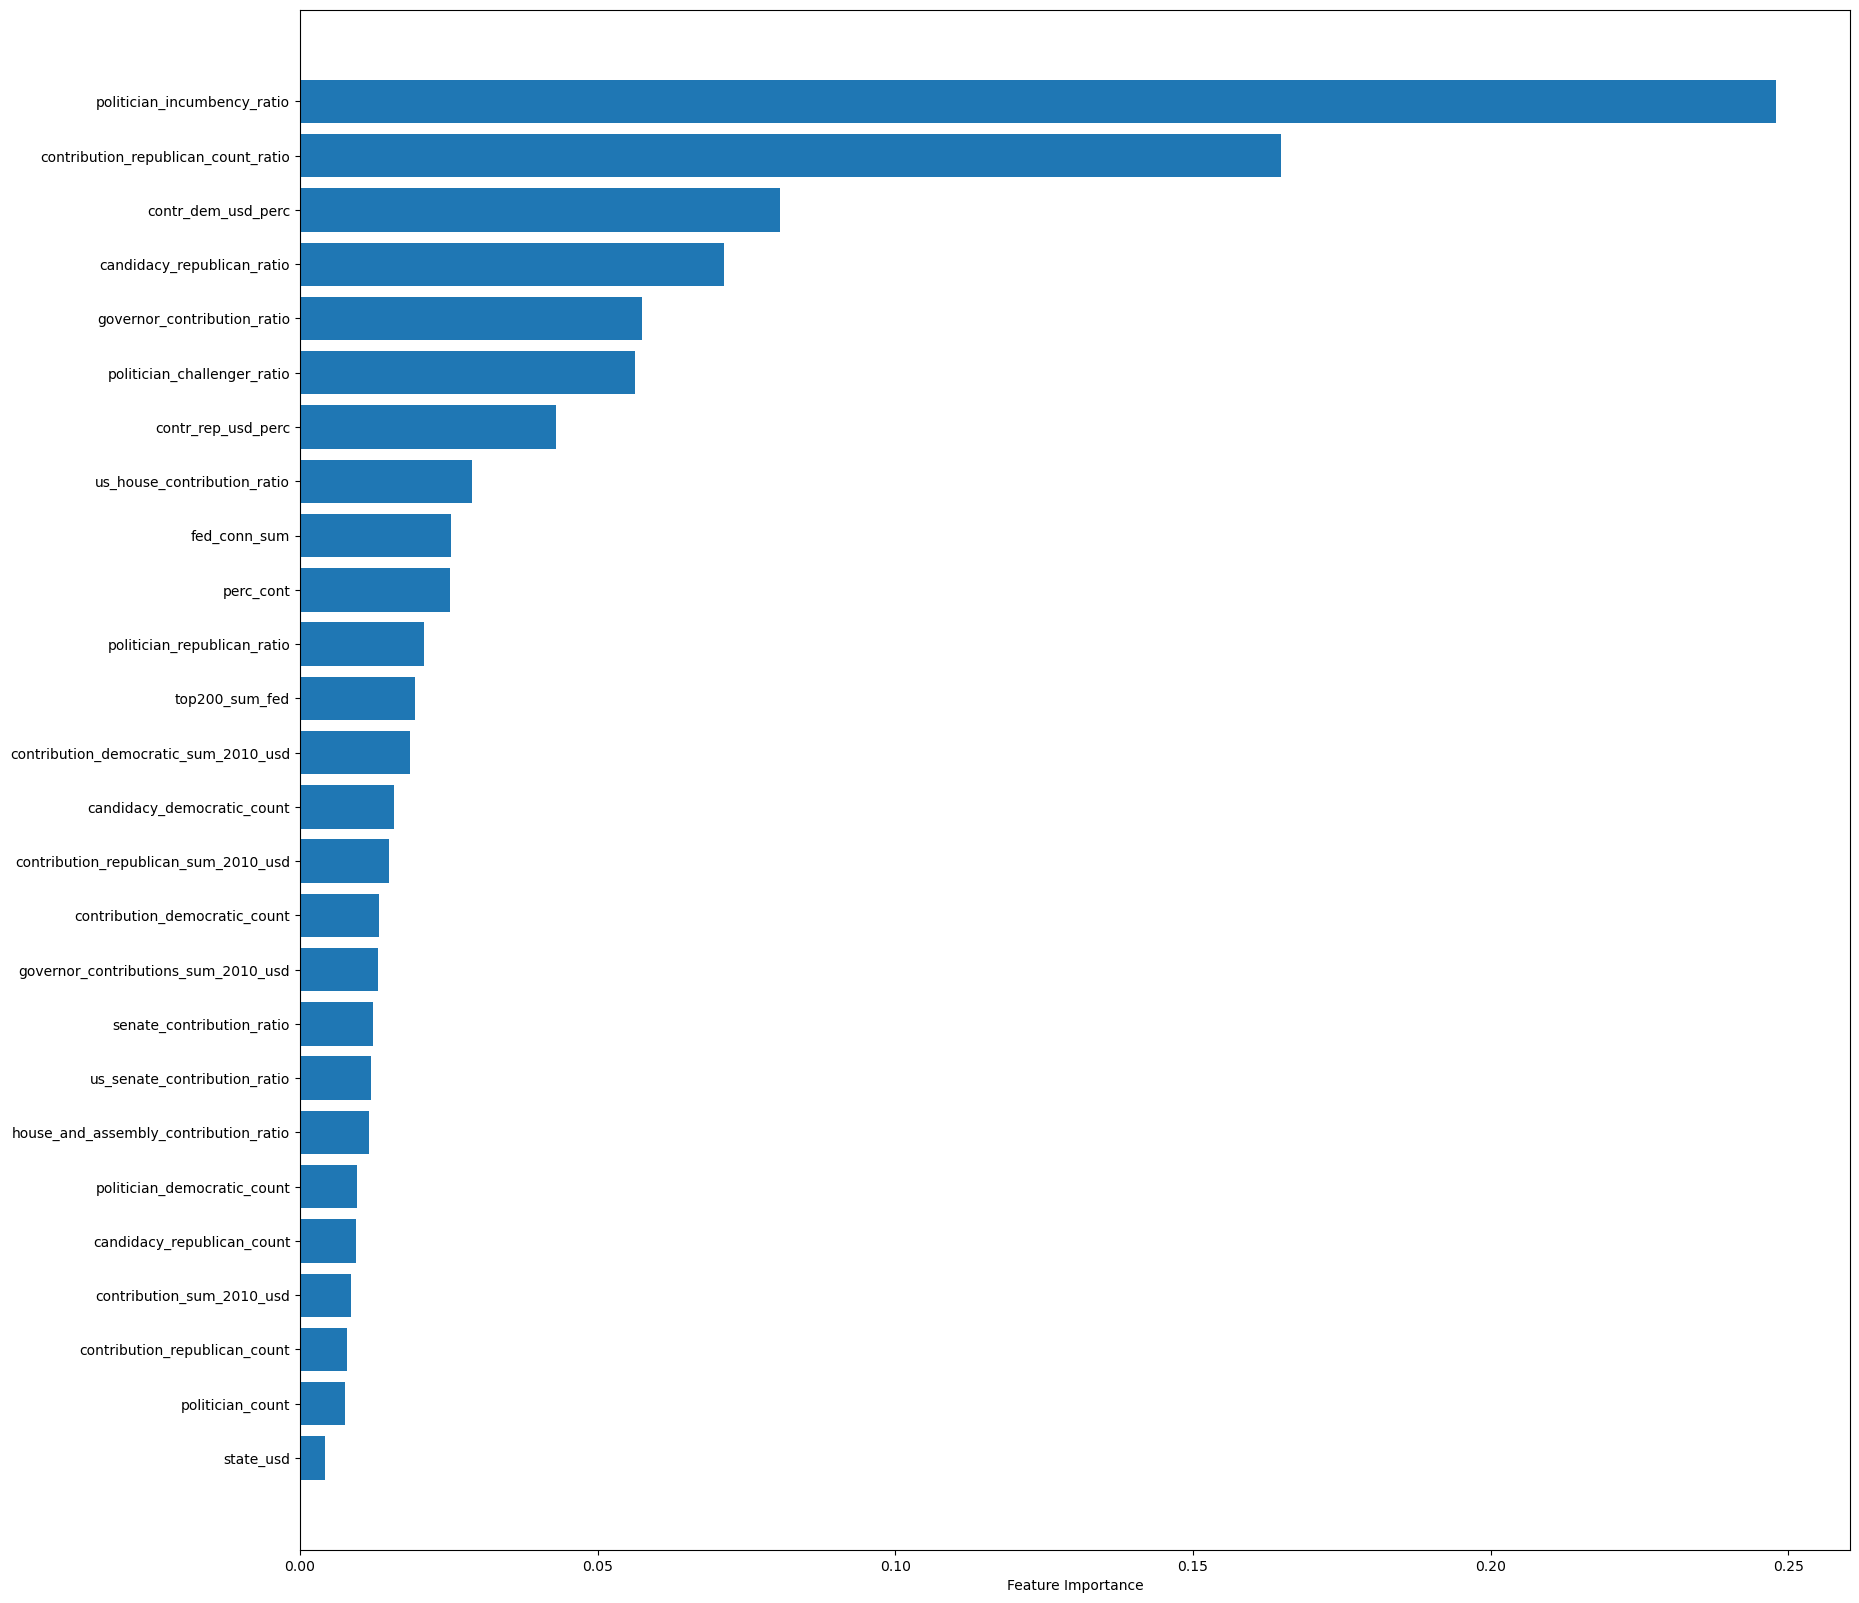

In [163]:
#barplot of feature importance
import matplotlib.pyplot as plt
plt_1 = plt.figure(figsize=(20,20))
sort = xgb_r.feature_importances_.argsort()
plt.barh(x_train_cleaned.columns[sort], xgb_r.feature_importances_[sort])
plt.xlabel("Feature Importance")

In [165]:
feature_imp=pd.DataFrame(columns=['Feature','Importance'])
feature_imp['Feature']=x_train_cleaned.columns[sort]
feature_imp['Importance']=xgb_r.feature_importances_[sort]
feature_imp

,Feature,Importance
0,state_usd,0.004121
1,politician_count,0.007643
2,contribution_republican_count,0.007857
3,contribution_sum_2010_usd,0.008644
4,candidacy_republican_count,0.009441
5,politician_democratic_count,0.009601
6,house_and_assembly_contribution_ratio,0.011615
7,us_senate_contribution_ratio,0.012008
8,senate_contribution_ratio,0.012334
9,governor_contributions_sum_2010_usd,0.013081


In [130]:
#adding necessary features to x_test_cleaned
#x_test_cleaned.drop(columns=["candidacy_count"],inplace=True)
x_test_cleaned["us_house_contribution_ratio"]=data_test["us_house_contribution_ratio"]
x_test_cleaned["senate_contribution_ratio"]=data_test["senate_contribution_ratio"]
x_test_cleaned["us_senate_contribution_ratio"]=data_test["us_senate_contribution_ratio"]

In [135]:
#playing with columns to get better results 
x_train_cleaned.drop(columns=["house_and_assembly_contributions_sum_2010_usd",
                            "senate_contributions_sum_2010_usd"],inplace=True)
x_test_cleaned.drop(columns=["house_and_assembly_contributions_sum_2010_usd",
                            "senate_contributions_sum_2010_usd"],inplace=True)

In [136]:
#playing with columns to get better results 
x_train_cleaned.drop(columns=["us_house_contributions_sum_2010_usd",
                            "us_senate_contributions_sum_2010_usd"],inplace=True)
x_test_cleaned.drop(columns=["us_house_contributions_sum_2010_usd",
                            "us_senate_contributions_sum_2010_usd"],inplace=True)

In [158]:
#predicting
y_pred=xgb_r.predict(x_test_cleaned)

In [159]:
sample=pd.read_csv('sample_solutions.csv')
sample

,index,winner_ratio
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5
...,...,...
115227,115227,0.5
115228,115228,0.5
115229,115229,0.5
115230,115230,0.5


In [160]:
submit=pd.DataFrame()
submit['winner_ratio']=y_pred
submit['index']=sample['index']
submit=submit[['index','winner_ratio']]
submit

,index,winner_ratio
0,0,0.890926
1,1,0.969756
2,2,0.598503
3,3,0.512886
4,4,0.909312
...,...,...
115227,115227,0.821830
115228,115228,0.925330
115229,115229,0.963606
115230,115230,0.926898


In [161]:
submit.to_csv("C:/Users/urvis/Downloads/final_submission300.csv")
#x_train_cleaned.to_csv("C:/Users/adity/Downloads/test.csv")